# Image Thresholding
If value is above, it is object
If it is below or equal, it is background


In [27]:
#Load images
import cv2
import numpy as np
import matplotlib.pyplot as plt


Isodata Threshold = 0.5222762755897183
Isodata Threshold = 0.5347047394181544


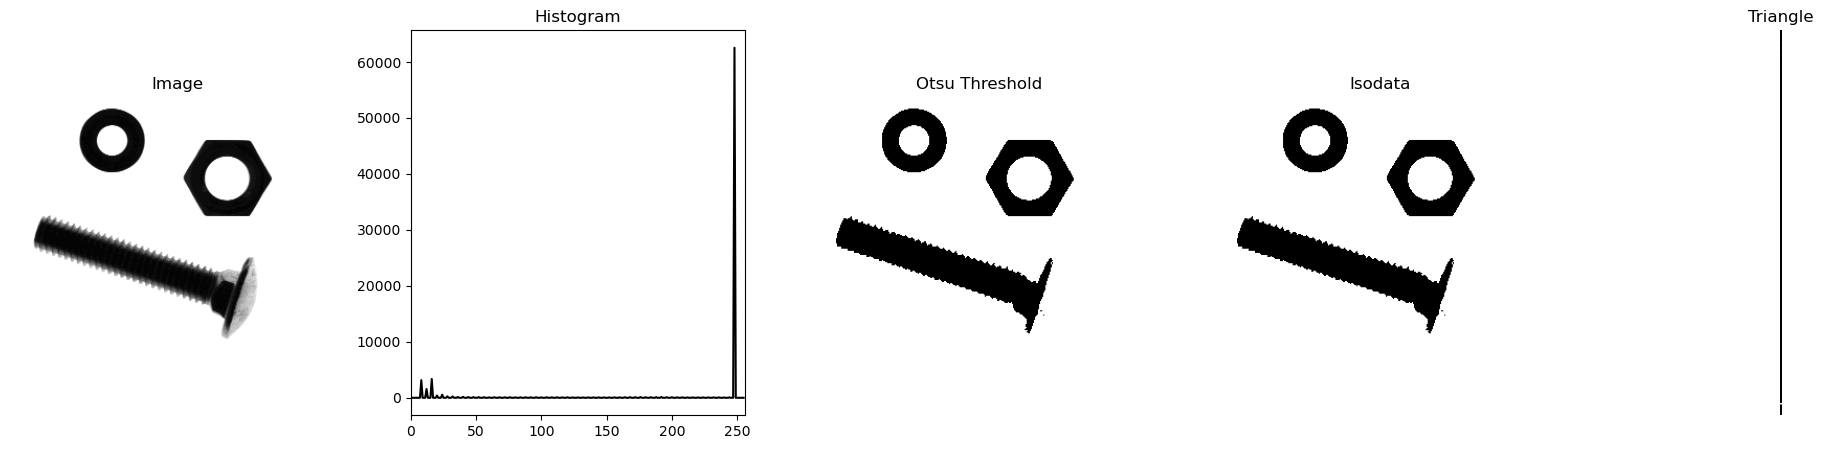

In [53]:
# Hardware image    
img = cv2.imread("Hardware.png", cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Otsu's Method
ret1,th1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#IsoData method
t = 0.4
while True:
    # Create a boolean mask where True represents values less than the threshold
    mask = img < t*255
    # Calculate the mean of elements that satisfy the condition
    mu1 = np.mean(img[mask])
    mask2 = img >= t*255
    mu2 = np.mean(img[mask2])
    
    tNew = ((mu1 + mu2)/2)/255

    if (abs(t - tNew) < 0.01):
       break
    t = tNew
    print("Isodata Threshold = "+ t.astype(str))


ret2,th2 = cv2.threshold(img,int(255*t),255,cv2.THRESH_BINARY)

#Triangle method
histPeak = hist.max()





#### Create a figure with three subplots###
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(25, 5))

# Plot the image in the first subplot
ax1.set_title('Image')
ax1.imshow(img, cmap='gray')
ax1.axis('off')

# Plot the histogram in the second subplot
ax2.set_title('Histogram')
ax2.plot(hist, color='black')
ax2.set_xlim([0, 256])

# Otsu's
ax3.set_title('Otsu Threshold')
ax3.imshow(th1, cmap='gray')
ax3.axis('off')

# Isodata
ax4.set_title('Isodata')
ax4.imshow(th2, cmap='gray')
ax4.axis('off')

# Triangle
ax5.set_title('Triangle')
ax5.imshow(hist, cmap='gray')
ax5.axis('off')


plt.show()



In [ ]:
# Nuclei
img = cv2.imread("Nuclei.png", cv2.IMREAD_GRAYSCALE)

In [ ]:
#Orca
img = cv2.imread("Orca.png", cv2.IMREAD_GRAYSCALE)